# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

Gabriel Murakami Alves

#### RA

11071916

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha um para este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [0]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np

diabetes_dataset = ds.load_diabetes()
diabetes_target = diabetes_dataset.target
diabetes_data = diabetes_dataset.data

boston_dataset = ds.load_boston()
boston_target = boston_dataset.target
boston_data = boston_dataset.data

linnerud_dataset = ds.load_linnerud()
linnerud_target = linnerud_dataset.target
linnerud_data = linnerud_dataset.data

In [0]:
print(diabetes_data.shape)
print(diabetes_target.shape)

(442, 10)
(442,)


In [0]:
print(boston_data.shape)
print(boston_target.shape)

(506, 13)
(506,)


In [0]:
print(linnerud_data.shape)
print(linnerud_target.shape)

(20, 3)
(20, 3)


In [0]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

In [0]:
pca = PCA(n_components=1)
diabetes_data_transformed_pca = pca.fit_transform(diabetes_data)

fastica = FastICA(n_components=1)
boston_data_transformed_ica = fastica.fit_transform(boston_data)

isomap = Isomap(n_components=1)
linnerud_data_transformed_iso = isomap.fit_transform(linnerud_data)
linnerud_target_transformed_iso = isomap.fit_transform(linnerud_target)
np.reshape(linnerud_data_transformed_iso, (20))

array([   9.74809487,  -42.53875631,  -74.36624767,  -53.99299798,
          1.12157741,  -57.5214739 ,  -57.4057784 ,  -32.85140453,
         35.68091927,  216.85753313,  -38.25626893,   83.94307327,
         91.92043741, -107.92431517,  -88.62201896,   87.55746336,
        -99.63682834,   92.53130388,   82.65609615,  -48.90040857])

In [0]:
print("Diabetes: " + str(diabetes_data_transformed_pca.shape))
print("Boston: " + str(boston_data_transformed_ica.shape))
print("Linnerud Data: " + str(linnerud_data_transformed_iso.shape))
print("Linnerud Target: " + str(linnerud_target_transformed_iso.shape))

Diabetes: (442, 1)
Boston: (506, 1)
Linnerud Data: (20, 1)
Linnerud Target: (20, 1)


In [0]:
#Diabetes
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11,7)

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
x_test_diabetes = x_test
y_test_diabetes = y_test
y_pred_diabetes = reg.predict(x_test)

print("MSE: " + str(mean_squared_error(y_test_diabetes, y_pred_diabetes)))
print("R2: " + str(r2_score(y_test_diabetes, y_pred_diabetes)))

MSE: 3105.7705553962437
R2: 0.23764457489162516


No handles with labels found to put in legend.


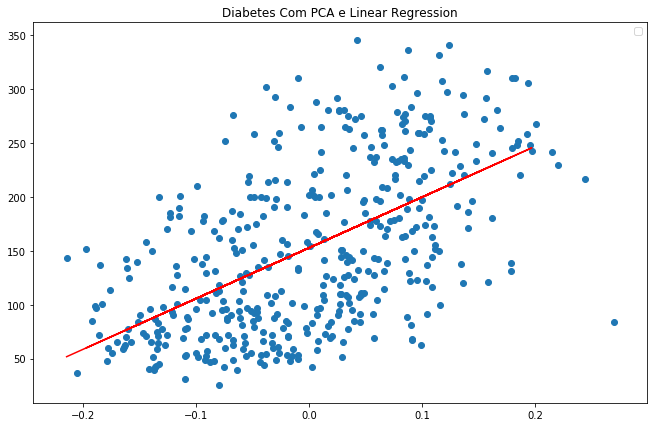

In [0]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(x_test_diabetes, y_pred_diabetes, color="red")
plt.title("Diabetes Com PCA e Linear Regression")
plt.legend()
plt.show()

In [0]:
#Boston
x_train, x_test, y_train, y_test = train_test_split(boston_data_transformed_ica, boston_target, test_size=0.20)

rid = linear_model.Ridge(alpha=1.0)
rid.fit(x_train, y_train)
x_test_boston = x_test
y_test_boston = y_test
y_pred_boston = rid.predict(x_test)

print("MSE: " + str(mean_squared_error(y_test_boston, y_pred_boston)))
print("R2: " + str(r2_score(y_test_boston, y_pred_boston)))

MSE: 75.31413711420727
R2: 0.1724333765677164


No handles with labels found to put in legend.


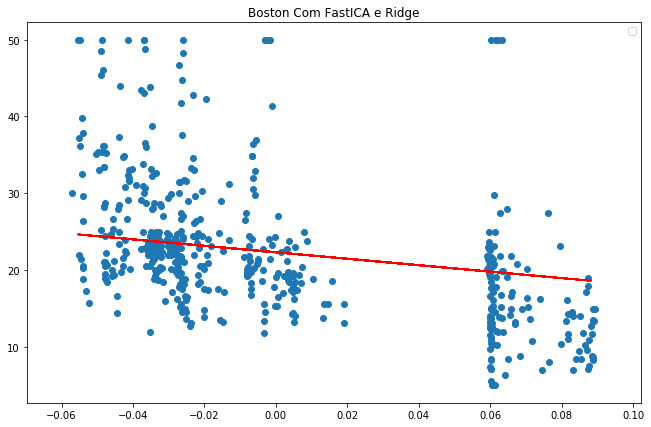

In [0]:
plt.scatter(boston_data_transformed_ica, boston_target)
plt.plot(x_test_boston, y_pred_boston, color="red")
plt.title("Boston Com FastICA e Ridge")
plt.legend()
plt.show()

In [0]:
#Linnerud
x_train, x_test, y_train, y_test = train_test_split(linnerud_data_transformed_iso, linnerud_target_transformed_iso, test_size=0.20)

lassolars = linear_model.LassoLars(alpha=1.0)
lassolars.fit(x_train, y_train)
x_test_linnerud = x_test
y_test_linnerud = y_test
y_pred_linnerud = lassolars.predict(x_test)

print("MSE: " + str(mean_squared_error(y_test_linnerud, y_pred_linnerud)))
print("R2: " + str(r2_score(y_test_linnerud, y_pred_linnerud)))

MSE: 848.6375673807097
R2: -0.9812952196973503


No handles with labels found to put in legend.


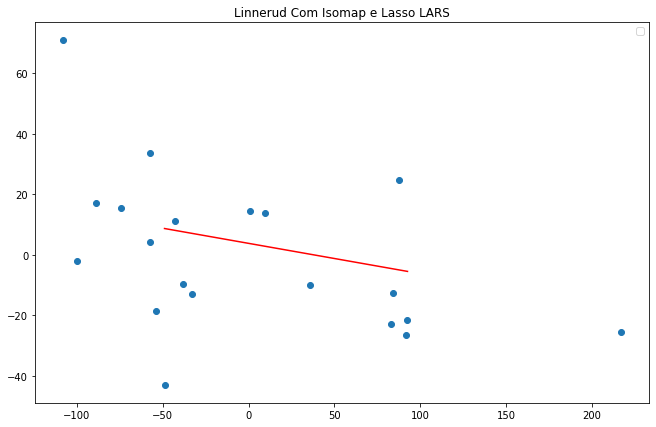

In [0]:
plt.scatter(linnerud_data_transformed_iso, linnerud_target_transformed_iso)
plt.plot(x_test_linnerud, y_pred_linnerud, color="red")
plt.title("Linnerud Com Isomap e Lasso LARS")
plt.legend()
plt.show()

Referências:
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">Boston</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes">Diabetes</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud">Linnerud</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars">LassoLars</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html">Isomap</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html">FastICA</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a>
